# <center>PROJET NLP & WEB MINING 

## Installation des packages et données nécessaires

L'exécution du bloc ci-dessous permet dans un premier temps de télécharger les données depuis les adresses spécifiées en l'occurence depuis le répertoire de Guillaume Gravier. Les données seront enregistrées dans le répertoire courant et il ne restera plus qu'à les charger pour les exploiter.

Dans un second temps, il installe successivement les librairies feedparser, newspaper3k et le modèle fr_core_news_md de spacy. 

In [ ]:
#Téléchargement des données dans le répertoire courant
!wget https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/lesechos.json
!wget https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/sources.json

# installation des librairies
!pip install feedparser
!pip install newspaper3k
!python -m spacy download fr_core_news_md

--2023-03-05 17:06:44--  https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/lesechos.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8276509 (7.9M) [application/json]
Saving to: ‘lesechos.json’

lesechos.json       100%[===================>]   7.89M  10.1MB/s    in 0.8s    

2023-03-05 17:06:46 (10.1 MB/s) - ‘lesechos.json’ saved [8276509/8276509]

--2023-03-05 17:06:46--  https://people.irisa.fr/Guillaume.Gravier/teaching/ENSAI/data/sources.json
Resolving people.irisa.fr (people.irisa.fr)... 131.254.254.107
Connecting to people.irisa.fr (people.irisa.fr)|131.254.254.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347 [application/json]
Saving to: ‘sources.json’

sources.json        100%[===================>]     347  --.-KB/s    in 0s      

2023-03-05 17:06:46 (58.9 MB/s) - ‘sources.json’

Chargement de la chaîne de traitement **spaCy** pour la langue française ***fr_core_news_md***

In [ ]:
import spacy
nlp = spacy.load('fr_core_news_md') # charger le package de traitement de langage 'fr_core_news_md'

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


**Chargement des librairies nécessaires à la réalisation des consignes**

In [ ]:
#Chargement des librairies nécessaires à la réalisation des consignes
import pandas as pd
import json
import feedparser as fp
import ssl
from newspaper import Article
import numpy
import pickle

import urllib.request 
from urllib.parse import urlparse

### **1. En vous aidant de l'exemple ci-dessus, écrire un premier programme (une cellule dans le notebook) qui réalise les opérations suivantes**



• **Lecture de la base de données existantes lesechos.json – regardez au passage la structure de ce fichier json et les informations qu’il contient**

> Le fichier lesechos s'affiche sous la forme d'un **dictionnaire imbriqué** de dictionnaire. Dans le premier dictionnaire les clés sont les liens des différents articles. A chaque lien d'article est associé à nouveau un dictionnaire qui comporte plusieurs clés tels que **le titre, la date, l'auteur,  la catégorie, le contenu de l'article, le lien de l'image et le lien du fichier**. Les valeurs associées à ces différentes clés sont soit des chaînes de caractère comme par exemple pour le ***titre*** et le ***contenu***, ou des listes de chaînes de caractère comme pour la clé ***auteur***.

> **Remarque** : Pour ce fichier lesechos, la plupart des informations concernant les auteurs sont vides, certaines dates sont manquantes. Quant aux images, les liens ne renvoient pas aux mêmes formats d'images: certains ont des extensions ***jpg*** tandis que d'autres ***png***. 


• **Identifier les informations disponibles dans le flux RSS de l'exemple ci-dessus et les éléments correspondants dans la structure de données retournées par fp.parse**


> Nous exécutons le code fourni à titre d'exemple pour comprendre la procédure de construction et de mise à jour de la base de données du fichier lesecho.json. La fonction **parse** du package **feedparser** permet de récupérer un flux RSS et la liste des éléments qu'il contient.

> A partir du flux RSS du journal **Le Monde**, nous récupérons des informations comme le titre d'un article, son lien, son contenu, sa date de publication.

>Le flux du journal **Le Monde** écouté se présente sous la forme d'un dictionnaire qui contient les élements suivants: -- 'bozo', 'entries', 'feed', 'headers', 'updated', 'updated_parsed', 'href', 'status', 'encoding', 'version', 'namespaces' --. C'est dans la clé **entries** que se situent les informations concernant les articles que nous voulons récupérer.
Les articles sont présentés sous forme d'entrée. Il y a 18 entrées dans le flux que nous avons écouté signifiant que le flux a permis de récupérer 18 articles du journal Le Monde. 
Le type de l'objet **data** est un feedparser.util.FeedParserDict. 
> Dans le feed nous avons les éléments suivants: 'title',
 'title_detail', 'subtitle', 'subtitle_detail', 'rights', 'rights_detail', 'links', 'link', 'published', 'published_parsed', 'language'.

> Dans chaque article on retrouve les éléments suivants: 'title', 'title_detail', 'published', 'published_parsed' 'summary', 'summary_detail', 'id', 'guidislink', 'link', 'links', 'media_content', 'content', 'media_credit','credit'.

> Il est important de noter que chaque site ou journal a sa propre façon de nommer les informations contenues dans son flux RSS. Cela pourrait être l'un des principaux problèmes liés à l'utilisation/la récupération d'informations provenant de plusieurs sites web (en raison du code source qui n'a pas toujours la même structure).


In [ ]:
# ouvrir le fichier json lesechos
f= open('lesechos.json')

# retourner un objet JSON sous forme de dictionnaire
echos = json.load(f)

#afficher la structure et les informations contenus dans le fichier
#print('lesechos')
display(echos)

In [ ]:
# (a) se premunir contre le blocage de commande

ssl._create_default_https_context = ssl._create_unverified_context
# (b) recuperer le fichier RSS

url = "https://www.lemonde.fr/rss/une.xml"
data = fp.parse(url)
# (c) visualiser les elements du fichier RSS
print(data.feed.title)
print(data.feed.published)
# (d) iterer sur les entrees du flux RSS
for item in data.entries:
  print(item.title, item.published, item.link)

Le Monde.fr - Actualités et Infos en France et dans le monde
Sun, 05 Mar 2023 21:15:08 +0000
Le vieillissement de la population, un défi qui dépasse de loin le problème des retraites Sun, 05 Mar 2023 17:00:09 +0100 https://www.lemonde.fr/economie/article/2023/03/05/le-vieillissement-de-la-population-un-defi-qui-depasse-de-loin-le-probleme-des-retraites_6164241_3234.html
A Bruxelles, la guerre du nucléaire entre l’Allemagne et la France fait rage Sun, 05 Mar 2023 06:03:16 +0100 https://www.lemonde.fr/economie/article/2023/03/05/a-bruxelles-la-guerre-du-nucleaire-entre-l-allemagne-et-la-france-fait-rage_6164197_3234.html
Grèves contre la réforme des retraites : des routiers à l’énergie, la mobilisation commence avant la « mise à l’arrêt » du 7 mars Sun, 05 Mar 2023 14:26:57 +0100 https://www.lemonde.fr/politique/article/2023/03/05/retraites-des-routiers-a-l-energie-la-mobilisation-commence-avant-la-mise-a-l-arret-du-7-mars_6164234_823448.html
Guerre en Ukraine, en direct : la bataille po

In [ ]:
#Explorer le flux de données écouté
print('Ce que nous avons dans le feed perser')
print(list(data.keys()))


Ce que nous avons dans le feed perser
['bozo', 'entries', 'feed', 'headers', 'updated', 'updated_parsed', 'href', 'status', 'encoding', 'version', 'namespaces']


In [ ]:
print('Les articles sont présentés sous forme d\'entrée. Il y a', len(data.entries), 'entrées dans le flux que nous avons écouté')
type(data)

data

Les articles sont présentés sous forme d'entrée. Il y a 18 entrées dans le flux que nous avons écouté


{'bozo': False,
 'entries': [{'title': 'Grèves contre la réforme des retraites\xa0: des routiers à l’énergie, la mobilisation commence avant la «\xa0mise à l’arrêt\xa0» du 7\xa0mars',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://www.lemonde.fr/rss/une.xml',
    'value': 'Grèves contre la réforme des retraites\xa0: des routiers à l’énergie, la mobilisation commence avant la «\xa0mise à l’arrêt\xa0» du 7\xa0mars'},
   'published': 'Sun, 05 Mar 2023 14:26:57 +0100',
   'published_parsed': time.struct_time(tm_year=2023, tm_mon=3, tm_mday=5, tm_hour=13, tm_min=26, tm_sec=57, tm_wday=6, tm_yday=64, tm_isdst=0),
   'summary': 'Plusieurs syndicats de routiers appellent à une grève anticipée, avec des blocages organisés dès lundi matin.',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://www.lemonde.fr/rss/une.xml',
    'value': 'Plusieurs syndicats de routiers appellent à une grève anticipée, avec des blocages organisé

In [ ]:
#Les éléments du feed
[ element for element in data.feed]

['title',
 'title_detail',
 'subtitle',
 'subtitle_detail',
 'rights',
 'rights_detail',
 'links',
 'link',
 'published',
 'published_parsed',
 'language']

In [ ]:
#Les éléments d'un article
[ element for element in data.entries[0]]

['title',
 'title_detail',
 'published',
 'published_parsed',
 'summary',
 'summary_detail',
 'id',
 'guidislink',
 'link',
 'links',
 'media_content',
 'content',
 'media_credit',
 'credit']

• **Pour chacun des flux RSS listés dans le fichier sources.json** :

– lire les données du flux RSS

– scanner les articles et repérer ceux qui ne sont pas déjà présents dans la base de données

In [ ]:
# Opening JSON file
f= open('sources.json')

# retourner un objet json sous forme de dictionbaire
source = json.load(f)
#print('Sources')
display(source)


{'Actualités valeurs': 'https://services.lesechos.fr/rss/investir-actualites-valeurs.xml',
 'Investir responsable': 'https://services.lesechos.fr/rss/investir-responsable.xml',
 'Marchés et Indices': 'https://services.lesechos.fr/rss/investir-marches-indices.xml',
 'Placement': 'https://services.lesechos.fr/rss/investir-placements.xml'}



> Le fichier source contient 4 flux de données (RSS feed) que sont "actualités valeurs", "investir responsable", "Marchés et indices" et "Placement". Ce sont tous des sous rubriques du site **Les echos**.







In [ ]:
#source = pd.read_json('sources.json', typ ='Series')
#source



> **Explication du code de la cellule ci-dessous :**
* On charge d'abord les url à écouter dans le ficher 'sources.json'. Les données chargées sont sous la forme d'un dictionnaire. On crée des listes vides une contenant la liste de tous les articles déjà scrappés et une autre contenant les articles à scrapper.  La liste des articles déjà scrappés permet de vérifier que les articles à récupérer ne son pas déjà disponibles dans notre base de données existante.                                                                                                                
>* Ensuite, pour chaque url contenue dans le fichier 'sources.json' :                                                                                    

 >* On vérifie que pour chaque lien contenu 'entries' l'article n'est pas dans la base de données ;
  
 >* On télécharge l'article grâce au package **newspaper3k** depuis son lien ;
  
 >* On traite l'article téléchargé pour extraire les informations qui nous intéressent : *title*, *date*, *author*, etc.
  
 >* et on ajoute les information à la base de données existante.



In [ ]:
#  se premunir contre le bloquage de commande
ssl._create_default_https_context = ssl._create_unverified_context
#  recuperer le fichier RSS
rss_url = list(source.values())
articles = list()
stored_url = set()

for url in rss_url:
  #lecture des flux de données RSS
  data = fp.parse(url) 
  #iterer sur les entrees du flux RSS
  for item in data.entries:
    #récupérer le lien de chaque article
    link = item.link
    #Vérifier si le lien est déjà contenu dans la base de données existante et passer à l'itération suivante le cas échéant
    if link in stored_url:
      continue
      #scanner l'article
    article = Article(link)
    article.download()
    article.parse()
    articles.append({'index': link,
          'title': article.title,
          'authors': article.authors,
          'content': article.text})
    stored_url.add(link) #ajouter le lien s'il ne figure pas déjà dans la base de données

  database =  pd.DataFrame.from_dict(articles) #construction de la base de données
  

  #dir(objet) pour voir ses attributs

In [ ]:
database

,index,title,authors,content
0,https://investir.lesechos.fr/actu-des-valeurs/...,"Manitou table sur un rebond de la marge à 4,6%...",[],Par La Rédaction d'Investir\n\nPublié le 3 mar...
1,https://investir.lesechos.fr/actu-des-valeurs/...,"Chat avec Rémi Le Bailly, le 6 mars",[],Par La Rédaction d'Investir\n\nPublié le 2 mar...
2,https://investir.lesechos.fr/actu-des-valeurs/...,Tesla se passera en partie à l’avenir des serv...,[],Par La Rédaction d'Investir\n\nPublié le 2 mar...
3,https://investir.lesechos.fr/actu-des-valeurs/...,"LVMH, en hausse de 2% sur le Cac 40, va rachet...",[],Par La Rédaction d'Investir\n\nPublié le 1 mar...
4,https://investir.lesechos.fr/actu-des-valeurs/...,"Neoen, au plus bas depuis un an en Bourse, va ...",[],Par La Rédaction d'Investir\n\nPublié le 1 mar...
...,...,...,...,...
74,https://investir.lesechos.fr/placements/immobi...,Le PEA-PME enfin compétitif pour le crowdfundi...,[],Par Olivier Cheilan\n\nPublié le 9 févr. 2023 ...
75,https://investir.lesechos.fr/placements/immobi...,Immobilier : est-ce encore le bon moment pour ...,[],Par Sandra Mathorel\n\nPublié le 7 févr. 2023 ...
76,https://investir.lesechos.fr/marches-indices/b...,Le Royaume-Uni explore la possibilité d’un « B...,[],Par Arthur Le Denn\n\nPublié le 7 févr. 2023 à...
77,https://investir.lesechos.fr/placements/assura...,Le Sénat pour la possibilité de changer d’assu...,[],Par Remy Demichelis\n\nPublié le 1 févr. 2023 ...




> **Remarque importante**: La fonction Article du package newspaper3k présente quelques limites. Par exemple, il ne parvient pas à récupérer le nom des auteurs: la liste est vide. Dans le contenu (récupéré) de l'article, figurent la date de publication ainsi que le nom des auteurs. La librairie ne parvient donc pas à dissocier la date et l'auteur du contenu de l'article.



In [ ]:
# Création d'un dataframe vide pour récupérer les articles à l'intérieur 
data = pd.DataFrame(columns = ['index', 'title', 'authors', 'content', 'image', 'date'])
data

,index,title,authors,content,image,date


In [ ]:
data.columns

Index(['index', 'title', 'authors', 'content', 'image', 'date'], dtype='object')

## **2. Pour l'un des articles de votre flux RSS, regardez le code HTML de la page web. Pouvez-vous identifier les zones contenant le titre de l’article ? le texte de l’article ? Que faudrait-il faire pour récupérer le texte de l’article ? En quoi le recours à la librairie newspaper est-il utile ?**

In [ ]:
#Lien du Premier article de la base de données
database['index'][0]

'https://investir.lesechos.fr/actu-des-valeurs/la-vie-des-actions/manitou-table-sur-un-rebond-de-la-marge-a-46-cette-annee-mais-la-bourse-en-attendait-plus-1911902'



> Après avoir examiné le code HTML d'un article donné, nous ne pouvons pas identifier directement l'emplacement du titre et du contenu. Nous devons faire quelques manipulations auparavant, manuellement. 
> Par exemple pour identifier le titre de l'article, il faut inspecter le code html et identifier la balise qui contient le titre, comme l'illustre l'image ci-contre. Pour accéder au titre de l'article il faut cliquer dans  la section **body** puis choisir la sous section **div id="app"**, ensuite cliquer succesivement dans **main, section, div, header et enfin h1**: le titre est "Manitou table sur un rebond de la marge à 4.6% cette année, mais la Bourse en attendait plus"
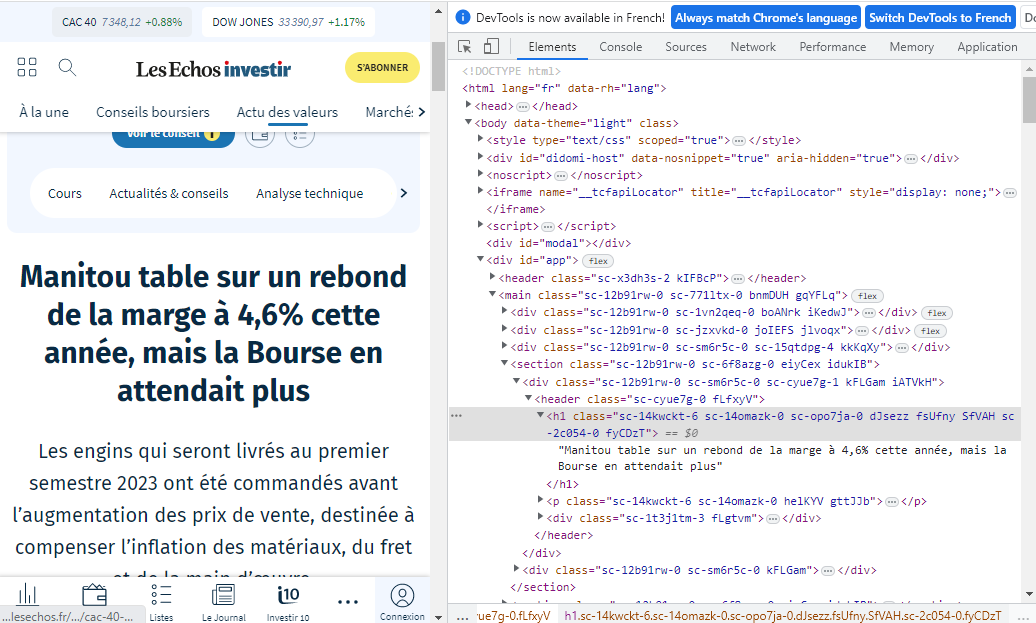

Pour récupérer le texte de l'article, il faut identifier l'emplacement de chaque mot et le sélectionner, puis concaténer tous les mots pour former le texte. Cette façon de procéder est lourde et prend du temps. De plus, la structure du code HTML peut différer d'une page à l'autre et il est difficile d'automatiser le processus. C'est pourquoi nous avons besoin d'une bibliothèque qui traite le code HTML de chaque page à notre place.
La bibliothèque de journaux est très utile car elle nous aide à obtenir directement les informations dont nous avons besoin sans passer par le code HTML de la page Web. En effet, la structure du code peut être différente d'une page web à l'autre. Cette bibliothèque est un gain de temps.






## **3. Reprendre votre programme de scrapping et le compléter de manière à mettre à jour votre base de données avec le texte des articles du flux RSS et le lien vers l'image illustrant l’article lorsqu’il y en a une. Vous pouvez inclure d’autres informations qui vous semblent utile pour un traitement ultérieur**

> Nous définissons une fonction de scrapping qui prend en entrées une base de données existante ainsi qu'une liste de flux à écouter et retourne une base de données actualisée au format dataframe contenant tous les articles scrappées aussi bien nouvellement que celles existantes.

> En bonus, la fonction fournit également les informations suivantes : 
* la taille de la base de données d'entrée ;
* la taille de la base de données **après mise à jour** ;
* et le nombre de nouveaux articles.
 
>Ces informations permettent d'avoir _une vue_ sur la mise à jour effectuée.




In [ ]:
rss_url = list(source.values())

In [ ]:
def scrapping(rss_url, database):
  """
  La fonction prend en entrées:
  - un objet rss_url de type liste qui comprend les flux de données à écouter 
  - une base de données database au format dataframe dont les colonnes sont dans l'ordre : 
  'index', 'title', 'authors', 'content', 'image', 'date'

  Cette fonction récupère dans un premier temps tous les liens des articles contenues dans la base de
  données dans un ensemble (set), et crée une liste qui doit récupérer plus tard les différentes caractéristiques
  des articles scrappées.
  Ensuite elle itère sur chaque flux de données contenue dans la liste des flux pour collecter les liens des articles
  stockées dans le dictionnaire data.entries. On vérifie que le lien n'existe pas déjà dans la base de données. 
  Si il n'est pas présent dans la base de données, chaque lien collecté est scanné au moyen de la commande 
  Article() de la librairie newspaper3k pour parcourir le site sur lequel l'article a été publié, le télécharger, recenser 
  les caractéristiques de l'article tels que le titre, la date, le contenu, etc.

  Ces éléments sont ensuites sauvegardées dans un objet de type dataframe qu'on complète à la base de données existante.

  """
  articles = list()
  stored_url = set(database['index'])
  #Taille database avant extraction
  len_before_update = len(database)

  for url in rss_url:
    #lecture des flux de données RSS
    data = fp.parse(url) 
    #iterer sur les entrees du flux RSS
    for item in data.entries:
      #récupérer le lien de chaque article
      link = item.link
      #Vérifier si le lien est déjà contenu dans la base de données existante et passer à l'itération suivante le cas échéant
      if link in stored_url:
        continue
        #scanner l'article
      article = Article(link)
      article.download()
      article.parse()
      articles.append({ 
          'index': link,
          'title': article.title,
          'authors': article.authors,
          'content': article.text,
          'image': article.top_image,
          'date': str(article.publish_date)})
  
  database1 =  pd.DataFrame.from_dict(articles) #construction de la base de données des nouveaux articles
  database = pd.concat([database, database1], ignore_index=True) # Fusion des bases de données
   # Taille de la base de donnée après mise à jour
  len_after_update = len(database)
    # ------------------ Quelques informations --------------
  print('#--------------------------------------------------------------------------------#')
  print("taille de la base de données avant mise à jour : ", len_before_update)
  print("taille de la base de données après mise à jour : ", len_after_update)
  print("Nombre de nouveaux articles : ", len_after_update - len_before_update)
  print('#--------------------------------------------------------------------------------#')
    # --------------------------------------------------------
  return database
  

In [ ]:
data1 = scrapping(rss_url=rss_url, database=data)

#--------------------------------------------------------------------------------#
taille de la base de données avant mise à jour :  0
taille de la base de données après mise à jour :  80
Nombre de nouveaux articles :  80
#--------------------------------------------------------------------------------#


In [ ]:
data1

,index,title,authors,content,image,date
0,https://investir.lesechos.fr/actu-des-valeurs/...,"Manitou table sur un rebond de la marge à 4,6%...",[],Par La Rédaction d'Investir\n\nPublié le 3 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-03 14:52:20+01:00
1,https://investir.lesechos.fr/actu-des-valeurs/...,"Chat avec Rémi Le Bailly, le 6 mars",[],Par La Rédaction d'Investir\n\nPublié le 2 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-02 14:14:01+01:00
2,https://investir.lesechos.fr/actu-des-valeurs/...,Tesla se passera en partie à l’avenir des serv...,[],Par La Rédaction d'Investir\n\nPublié le 2 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-02 11:40:53+01:00
3,https://investir.lesechos.fr/actu-des-valeurs/...,"LVMH, en hausse de 2% sur le Cac 40, va rachet...",[],Par La Rédaction d'Investir\n\nPublié le 1 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-01 12:05:03+01:00
4,https://investir.lesechos.fr/actu-des-valeurs/...,"Neoen, au plus bas depuis un an en Bourse, va ...",[],Par La Rédaction d'Investir\n\nPublié le 1 mar...,https://media.lesechos.com/api/v1/images/view/...,2023-03-01 11:16:41+01:00
...,...,...,...,...,...,...
75,https://investir.lesechos.fr/placements/immobi...,Le PEA-PME enfin compétitif pour le crowdfundi...,[],Par Olivier Cheilan\n\nPublié le 9 févr. 2023 ...,https://media.lesechos.com/api/v1/images/view/...,2023-02-09 16:22:43+01:00
76,https://investir.lesechos.fr/placements/immobi...,Immobilier : est-ce encore le bon moment pour ...,[],Par Sandra Mathorel\n\nPublié le 7 févr. 2023 ...,https://media.lesechos.com/api/v1/images/view/...,2023-02-07 15:36:09+01:00
77,https://investir.lesechos.fr/marches-indices/b...,Le Royaume-Uni explore la possibilité d’un « B...,[],Par Arthur Le Denn\n\nPublié le 7 févr. 2023 à...,https://media.lesechos.com/api/v1/images/view/...,2023-02-07 15:17:23+01:00
78,https://investir.lesechos.fr/placements/assura...,Le Sénat pour la possibilité de changer d’assu...,[],Par Remy Demichelis\n\nPublié le 1 févr. 2023 ...,https://media.lesechos.com/api/v1/images/view/...,2023-02-01 16:41:37+01:00


In [ ]:
data1.to_csv('data.csv')

In [ ]:
data = pd.read_csv('data.csv')

## **4. Les images étant susceptibles de ne pas rester sur le site web, il faudrait idéalement en faire une copie locale dans notre base de données pour pouvoir s'y référerer ultérieurement. Comment procéderiez-vous pour ce faire ? On ne vous demande pas de faire le programme correspondant, juste de donner l’idée de comment vous vous y prendriez.**



> Les sites web s'actualisent régulièrement et de ce fait certains articles disparaissent avec leur contenu, leur image etc. Avec le programme scrapping écrit précédemment nous ne stockons que les liens des images et non les images en elles mêmes. Pour pouvoir s'y référer ultérieurement, la solution serait de télécharger également les images dans notre base de données au moment où on collecte les autres informations qui y sont liées. En enregistrant directement  le fichier image dans notre base de données, on pourra ensuite enregistrer la base de données en informations binaires avec la bibliothèque pickle. Pour un meilleur stockage des données, nous pourrions utiliser SQL et sauvegarder l'élément binaire pickle dans un tableau binaire en SQL. Cela pourrait être long, mais avec une classe DAO nous pourrions stocker en local toutes les informations nécessaires (nom, titre, fichiers images...).



## **5. Donnez une idée d’une (ou plusieurs) autre(s) source(s) que l’on pourrait-on écouter pour collecter des informations complémentaires sur ces articles ? Sans donner le code, donnez une idée de ce que l’on pourrait collecter sur ces sources et de la/des librairie(s) qui pourrai(en)t nous aider en cela.**

> On peut écouter les flux provenant des sites comme france24, Le figaro, france tv info, le Monde, l'Equipe, Francesoir, Futura-sciences, etc. On peut collecter des informations sur les débats politiques, les technologies, l'avancée de la science, les actualités du monde, l'économie, la crise entre l'Ukraine et la Russie, etc. On pourrait utiliser le framework BeautifulSoup4 (bs4) et la librairie Scrapy qui sont très populaires pour le web scrapping. 



In [ ]:
# Les sources de france24
source1 = [
            "https://www.france24.com/fr/rss",
            "https://www.france24.com/fr/%C3%A9co-tech/rss",
            "https://www.france24.com/fr/sports/rss",
            "https://www.france24.com/fr/culture/rss",
            "https://www.france24.com/fr/environnement/rss",
            "https://www.france24.com/fr/tag/entr/rss",
            "https://www.francetvinfo.fr/politique.rss",
            "https://www.francetvinfo.fr/societe.rss",
            "https://www.francetvinfo.fr/faits-divers.rss",
            "https://www.francetvinfo.fr/societe/justice.rss"
            ]

#Les sources provenant de LeMonde et figaro
source2 = ["https://www.lemonde.fr/rss/une.xml",
            "https://www.lefigaro.fr/rss/figaro_actualites.xml",
            "https://www.lefigaro.fr/rss/figaro_flash-actu.xml",
            "https://www.lefigaro.fr/rss/figaro_politique.xml",
            "https://www.lefigaro.fr/rss/figaro_politique_le-scan.xml",
            "https://www.lefigaro.fr/rss/figaro_elections.xml",
            "https://www.lefigaro.fr/rss/figaro_lefigaromagazine.xml"
            ]

source3 = ["https://www.lepoint.fr/rss.xml",
            "https://www.lejournaldesarts.fr/rss.xml", 
            "https://www.lhistoire.fr/flux-rss.xml",
            "https://www.letudiant.fr/rss.html"
            ]
#Les flux provenant de l'Equipe, Francesoir, Futura-sciences
source4 = [ "https://dwh.lequipe.fr/api/edito/rss?path=/",
            "https://www.francesoir.fr/rss.xml",
            "https://www.futura-sciences.com/rss/actualites.xml"
            ]
#Les flux provenant de ladepeche et de l'Independant
source5 = ["https://www.ladepeche.fr/rss.xml",
            "https://www.lindependant.fr/rss.xml"
            ]

In [ ]:
rss_urls = rss_url + source1+ source2+ source3+ source4+ source5

In [ ]:
data = pd.read_csv('data.csv')


In [ ]:
#On extrait les articles de toutes les sources susmentionnées
data = scrapping(rss_url=rss_url, database=data)

#--------------------------------------------------------------------------------#
taille de la base de données avant mise à jour :  3000
taille de la base de données après mise à jour :  3080
Nombre de nouveaux articles :  80
#--------------------------------------------------------------------------------#


# **Extraction d’information**

## **Extraction des entités nommées**

In [ ]:
# load pipeline and related models
nlp = spacy.load("fr_core_news_md")
# process text with pipeline
doc = nlp("Jean Dupont est maire de Plouguemeur. Apple n’y a pas de locaux.")
# list e that were detected
for e in doc.ents:
  print(e.text, e.start, e.end, e.label_)


Jean Dupont 0 2 PER
Plouguemeur 5 6 LOC
Apple 7 8 ORG
